<a href="https://colab.research.google.com/github/saumyadash9/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Saumya_Dash_Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato-Restaurant-Clustering-And-Sentiment-Analysis



##### **Project Type**    - Unsupervised 
##### **Contribution**    - Team
##### **Team Member 1 -** Saumya Dash
##### **Team Member 2 -**Kumar Abhinav Thakur

# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.
# Attribute Information
**Zomato Restaurant Data** 

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

**Zomato Restaurant reviews**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [378]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [379]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [380]:
# Loading both Zomato Restaurant names and Zomato Restaurant reviews Dataset
df1 = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [381]:
# Dataset First Look
#checking the top 5 rows of the names dataset
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [382]:
#checking the top 5 rows of the review dataset
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [383]:
# Dataset Rows & Columns count
#checking the number of rows and columns of df1
df1.shape

(105, 6)

In [384]:
#checking the number of rows and columns of df2
df2.shape

(10000, 7)

### Dataset Information

In [385]:
# Dataset Info
#checking the information about the no. of rows, columns, null values and the datatypes of all the columns in df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [386]:
#checking the information about the no. of rows, columns, null values and the datatypes of all the columns in df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [387]:
# Dataset Duplicate Value Count
# check duplicates
df1[df1.duplicated()]

,Name,Links,Cost,Collections,Cuisines,Timings


In [388]:
# Dataset Duplicate Value Count
df2.duplicated().sum()

36

In [389]:
# Viewing the duplictaed instances
df2[df2.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [390]:
#dropping duplicate instances from df2
df2.drop_duplicates(inplace = True)

#### Missing Values/Null Values

In [391]:
# Missing Values/Null Values Count
#Checking Null Values
null_df1= pd.DataFrame({"Total Values": df1.shape[0] , "Total Null values": df1.isnull().sum(),"%a of Null values" : round((df1.isnull().sum()/ df1.shape[0])*100 , 2) })
null_df1.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Collections,105,54,51.43
Timings,105,1,0.95
Name,105,0,0.00
Links,105,0,0.00
Cost,105,0,0.00
Cuisines,105,0,0.00


Text(0.5, 1.0, 'Missing Values in Dataset')

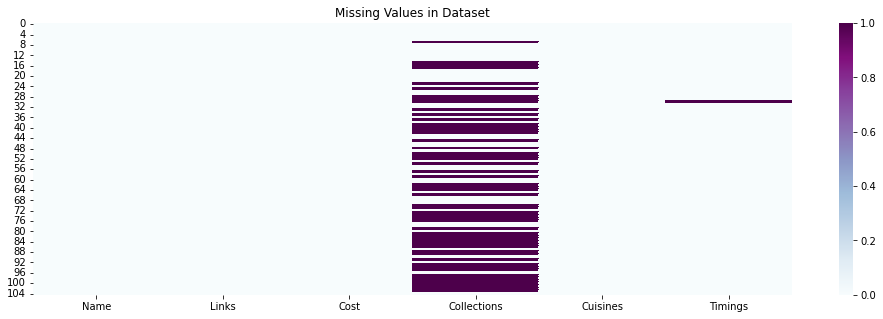

In [392]:
#vizualizing the null values of each column
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(),cbar=True,cmap = 'BuPu')
plt.title('Missing Values in Dataset')

In [393]:
# Missing Values/Null Values Count
#Checking Null Values
null_df2= pd.DataFrame({"Total Values": df2.shape[0] , "Total Null values": df2.isnull().sum(),"%a of Null values" : round((df2.isnull().sum()/ df2.shape[0])*100 , 2) })
null_df2.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Review,9964,9,0.09
Reviewer,9964,2,0.02
Rating,9964,2,0.02
Metadata,9964,2,0.02
Time,9964,2,0.02
Restaurant,9964,0,0.00
Pictures,9964,0,0.00


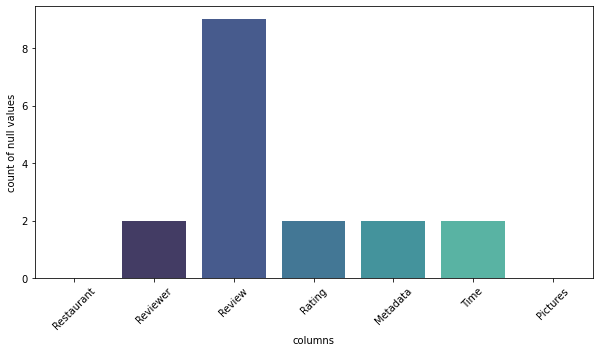

In [394]:
#vizualizing the columns with their total number of null values
null_df2 = df2.isnull().sum().reset_index()
null_df2.rename(columns = {'index':'columns', 0:'count of null values'}, inplace = True)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'columns',
             y = 'count of null values',
            data = null_df2, palette="mako")
sns.color_palette("mako", as_cmap=True)
plt.xticks(rotation= 45)
plt.show()

### What did you know about your dataset?

 **What did you know about your dataset?**
* We have 2 datasets zomato restaurant names and metadata(df1) and zomato restaurant reviews data(df2).
* There are 105 rows in df1 and 6 columns in the df1 namely 'Name', 'Links', 'Cost', 'Collections', 'Cuisines'and 'Timings'.
* There are 10000 rows in df1 and 7 columns in the df2 namely 'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time' and 'Pictures'
* Majority of the columns are textual.
* There are 36 duplicated instances in df2 and no duplicated instances in df1.
* We noticed that there were 2 columns Collections(54) and Timmings(1) in df1 whereas 4 columns Reviewer(9), Review(2), Rating(2), Metadata(2) and Time(2) in df2.

## ***2. Understanding Your Variables***

In [395]:
# Dataset Columns
#checking the columns of df1
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [396]:
#checking columns of df2
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [397]:
# Dataset Describe
#checking statistical description of the columns in df1
df1.describe(include='all').round(2)

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [398]:
# Dataset Describe
#checking statistical description of the columns in df2
df2.describe(include='all').round(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,9964,9962,9955,9962,9962,9962,9964.00
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.75
std,NaN,NaN,NaN,NaN,NaN,NaN,2.57
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


### Variables Description 













Zomato Resturant Names dataset:

1. Name:
 * It tells the name of Restaurants 
 * There are 105 restaurants in the dataset
2. Links:

 * It consists URL Links of Restaurants
 * The URL includes information about the restaurant, including the city name and location within the city.
 * It is observed that 104 restaurants in the dataset are located in the Gachibowli region of Hyderbad, while only one restaurant is located in The Tilt Bar Republic.
3. Cost:

 * It depicts  Per person estimated Cost of dining.
 * The costs are in string format and must be changed to integers by eliminating the ",".
4. Collections:

 * It shows the Tagging of Restaurants w.r.t. Zomato categories
 * 51.4% data is missing for collection column
5. Cuisines:

 * It shows the variety of Cuisines served by each Restaurants

6. Timings:

 * It displays the restaurant's opening and closing times.
 * It is observed that almost all the restaurants are approximately active from 12 noon to 12 at the midnight. Hence this attribute wouldn't be significant in the analysis.

Zomato Resturant Review dataset: 
1. Restaurant:

 * It depicts the name of the restaurant for which customers have left reviews.
2. Reviewer:

 *  It consists Name of the Reviewer who have left the reviews
 * There are 2 such instances for which the name of the customer/ reviewer is missing

3. Review:
 * It contains information from customer reviews regarding each restaurant's ambience, service, meals, and overall experience. It can be utilised for restaurant sentiment analysis.
 * There are 9 such instances for which the reviewes from the customer/ reviewer is missing.
4. Rating:

 * It has the Rating Provided by Reviewer ranging from 0 to 5.
 * There are 2 instances with missing values

5. Metadata:
 * Reviewer Metadata - No. of Reviews by each reviewer and followers separated by ",". It can be converted into two integer columns by removing the comma. There are 2 missing values.

6.  Time:
 * It shows Date and Time of Review which should be converted from string format to datetime format. There are 2 missing values.

7. Pictures:
 * It contains information about whether or not the reviewers uploaded any pictures

### Check Unique Values for each variable.

In [399]:
# list_df1 = ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [400]:
# list_df2 = ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
#        'Pictures']

In [401]:
# Checking Unique Values for each variables in df1 i.e. Zomato Restaurant Name Dataset.
print("Unique values in these categorical features: \n")
for i in list(df1.columns):
  print(f'Unique values in {i}>>>>>>>>>>>>>>>>>>>>>>>  {df1[i].unique()}')
  print('--------------------------------------------------------------------------------------')

Unique values in these categorical features: 

Unique values in Name>>>>>>>>>>>>>>>>>>>>>>>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitch

In [402]:
# Checking Unique Values for each variable in df2 i.e Zomato Restaurant Review Dataset
print("Unique values in these categorical features: \n")
for i in list(df2.columns):
  print(f'Unique values in {i}>>>>>>>>>>>>>>>>>>>>>>>  {df2[i].unique()}')
  print('--------------------------------------------------------------------------------------')

Unique values in these categorical features: 

Unique values in Restaurant>>>>>>>>>>>>>>>>>>>>>>>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster

## 3. ***Data Wrangling***

### Data Wrangling Code

In [403]:
# Write your code to make your dataset analysis ready.

In [404]:
#dropping collections column
df1.drop('Collections', axis=1, inplace=True)

In [405]:
#Impute one missing timing row with the mode of the timming column
df1['Timings'].fillna(df1['Timings'].mode()[0],inplace=True)

In [406]:
# changing the datatype of cost column from strings to integers
df1['Cost'] = df1['Cost'].str.replace(',','')
df1['Cost'] = df1['Cost'].astype('int')

In [407]:
#dropping null rows in reviews column in df2
df2.dropna(subset = ["Review"], inplace=True)

In [408]:
# replacing the 'Like' rating with 4 and changing the datatype from strings to float.
df2['Rating'] = df2['Rating'].replace('Like','4')
df2['Rating'] = df2['Rating'].astype('float')

In [409]:
#Changing the datatype pf Time column from strings to datetime datatype.
df2['Time'] = pd.to_datetime(df2['Time'])

In [410]:
#checking info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [411]:
#checking info of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Metadata    9955 non-null   object        
 5   Time        9955 non-null   datetime64[ns]
 6   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.2+ KB


In [412]:
# checking the value of links in first instance in df1
df1.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [413]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
df1['Location'] = df1['Links'].apply(location)

In [414]:
# counting the unique locations of the restaurant in hyderabad.
df1.Location.value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

In [415]:
#dropping link column
df1.drop('Links', axis=1, inplace=True)

In [416]:
#We will consider the count of cuisines list as in Cuisines there are values seperated by comma
list_of_cuisins = df1.Cuisines.str.split(', ')

df1['Cuisines_list'] = pd.Series()

for i in range(len(df1)):
  df1['Cuisines_list'][i] = list_of_cuisins[i]

In [417]:
#creating a feature named as total cuisines out of the cuisines list created above using lamda function and dropping the cusisine column
df1['Total Cuisines'] = df1['Cuisines_list'].apply(lambda x : len(x))
# df1.drop(['Cuisines'],axis=1,inplace=True)

In [418]:
#checking the top 5 instances to check the manipulations done above in the dataset
df1.head(5)

,Name,Cost,Cuisines,Timings,Location,Cuisines_list,Total Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad,"[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,hyderabad,"[Biryani, North Indian, Chinese]",3
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",hyderabad,"[Asian, Mediterranean, North Indian, Desserts]",4
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,hyderabad,"[Biryani, North Indian, Chinese, Seafood, Beve...",5
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",hyderabad,"[Asian, Continental, North Indian, Chinese, Me...",5


In [419]:
#creating two columns named as no. of reviews and followers using metadata by removing the comma between the values
# and changing the datatype
#and dropping the column Metadata from the dataset.
df2['No. of Reviews'],df2['Followers']=df2['Metadata'].str.split(',').str
df2['No. of Reviews'] = pd.to_numeric(df2['No. of Reviews'].str.split(' ').str[0])
df2['Followers'] = pd.to_numeric(df2['Followers'].str.split(' ').str[1])
df2 = df2.drop(['Metadata'], axis = 1)
df2.dtypes

Restaurant                object
Reviewer                  object
Review                    object
Rating                   float64
Time              datetime64[ns]
Pictures                   int64
No. of Reviews             int64
Followers                float64
dtype: object

In [420]:
#checking the top 2 rows in the dataset.
df2.head(2)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0


### What all manipulations have you done and insights you found?

Based on the initial overview of both the dataset we did following imputations to make our dataset analysis ready:




1.   **Timings**:
 Dropping this column since most of the restaurants have same timings in which they operate , so it will not yield any useful information for analysis.
2.  **Collections**:  Dropping this column because more than 50% of the data are missing in this particular column.
3. **Cost**: Since this column is in object datatype with comma seperated format. We first eliminated the comma from the numbers then we changed the datatype from object to int.
4. **Review**: This column contained null values in some rows so we eliminated those rows which had null values.
5. **Rating**:When we checked the unique values, we discovered that there was an incorrect entry called 'Like,' which was replaced by 4, assuming that someone had liked the restaurant and then we changed the datatype to float.
6. **Time**: We changed the datatype from object to datetime in this column.
7. **Cusines**: It was intially given in class string with comma seperated format , we imputed it with class list so that can be useful for us in extracting different cusines in the same restaurant. We also created another column which represents total cuisines in a particular restaurant.
8. **Links**: From the given Url we extracted the location of the restaurants by string using string indexing. We realised that 104 restaurants were from the same Gachibowli, Hyderabad location and 1 restaurant was from Thetitlebarrepublic location.
9. **Metadata**: We created two columns i.e No. of reviews and followers from the given Metadata by extracing information from it.

In [421]:
df1.describe()

,Cost,Total Cuisines
count,105.000000,105.000000
mean,861.428571,2.980952
std,510.149730,1.208790
min,150.000000,1.000000
25%,500.000000,2.000000
50%,700.000000,3.000000
75%,1200.000000,4.000000
max,2800.000000,6.000000


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Univariate Analysis

Text(0.5, 1.0, 'Distribution Estimated Cost of dining')

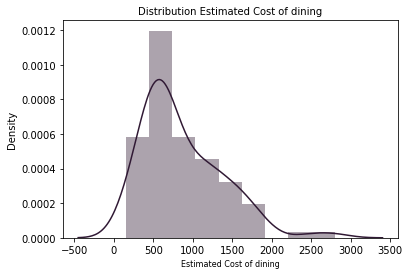

In [422]:
#Vizualizing the distribution of Cost of Dining using distplot.
sns.distplot(x=df1['Cost'], color = '#301934')
plt.xlabel('Estimated Cost of dining',size=8)
plt.title('Distribution Estimated Cost of dining',size=10)

##### 1. Why did you pick the specific chart?

DISTRIBUTION PLOT

Cost is a numerical feature, and we utilised a distribution plot to see how the cost of dining varied across all restaurants.

##### 2. What is/are the insight(s) found from the chart?

From the distribution curve it can be observed that most of restaurants have cost of dinning in the ranging from Rs.200-Rs.1000 and the median cost is around Rs.700

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This finding regarding the cost distribution can be useful in grouping clients based on their dining costs.



```
# This is formatted as code
```

#### Chart - 2 Univariate Analysis

Text(0.5, 1.0, 'Count of Restaurants as per the Ratings')

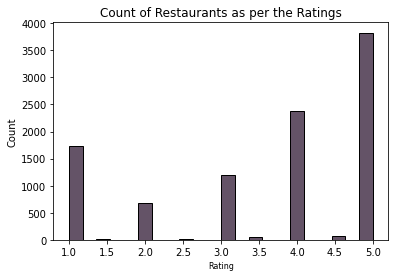

In [423]:
#vizualizing the restaurants counts based on the ratings given by the reviewers using histogram
sns.histplot(x= df2['Rating'], color = '#301934')
plt.xlabel('Rating',size=8)
plt.title('Count of Restaurants as per the Ratings')

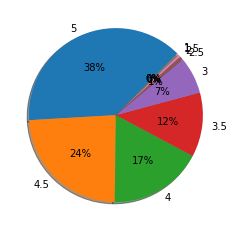

In [424]:
plt.pie(df2['Rating'].value_counts(),labels =[5,4.5,4,3.5,3,2.5,2,1.5,1], autopct='%1.0f%%',startangle=45, shadow = True)
plt.show()

##### 1. Why did you pick the specific chart?


HISTOGRAM

We picked histogram because we needed to count the number of restaurants based on the ratings given by the reviewers. 

##### 2. What is/are the insight(s) found from the chart?

From the univariate analysis of ratings column it is evident that most of the restaurants have been rated 5 followed by ratings of 4.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see there are alot of restaurants with ratings 1 to 3 that need to improved overall specifically restaurants with 1 rating.

#### Chart - 3 Bivariate Analysis

In [425]:
df_merged= df1.merge(df2, how='inner', left_on='Name', right_on='Restaurant')
df_merged.head(1)

,Name,Cost,Cuisines,Timings,Location,Cuisines_list,Total Cuisines,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad,"[Chinese, Continental, Kebab, European, South ...",6,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0


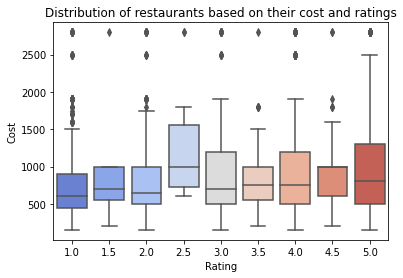

In [426]:
#vizualizing the distribution of restaurants based on their cost and ratings using boxplot.
sns.boxplot(df_merged.Rating, df_merged.Cost, palette = 'coolwarm')
plt.title('Distribution of restaurants based on their cost and ratings')
plt.show()

In [427]:
#checking info of the merged df
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            9955 non-null   object        
 1   Cost            9955 non-null   int64         
 2   Cuisines        9955 non-null   object        
 3   Timings         9955 non-null   object        
 4   Location        9955 non-null   object        
 5   Cuisines_list   9955 non-null   object        
 6   Total Cuisines  9955 non-null   int64         
 7   Restaurant      9955 non-null   object        
 8   Reviewer        9955 non-null   object        
 9   Review          9955 non-null   object        
 10  Rating          9955 non-null   float64       
 11  Time            9955 non-null   datetime64[ns]
 12  Pictures        9955 non-null   int64         
 13  No. of Reviews  9955 non-null   int64         
 14  Followers       8381 non-null   float64       
dtypes: d

##### 1. Why did you pick the specific chart?

BOXPLOT

We used boxplot here as we wanted to know the spread of costs of the restaurants across the different rated restaurants. Boxplot is used here to know the statistical distribution including the median and different quartiles of the data. 

##### 2. What is/are the insight(s) found from the chart?

From the bivariate analysis of the Ratings and Cost columns we got to know that people do not prefer costly restaurants. 
* Some of the costly restaurants have very less ratings and some of them do have a good rating.

* The average cost of all type of rated restaurants are almost close to each other

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see, there isn't a lot of information available on costly restaurants. Most likely because many individuals want to pay less, but we can also see that the Rating 5.0 box is the most vertically elongated, implying that many do not dine in expensive places. They don't go there very often, but the few times they do, they're satisfied.

#### Chart - 4 Bivariate Analysis

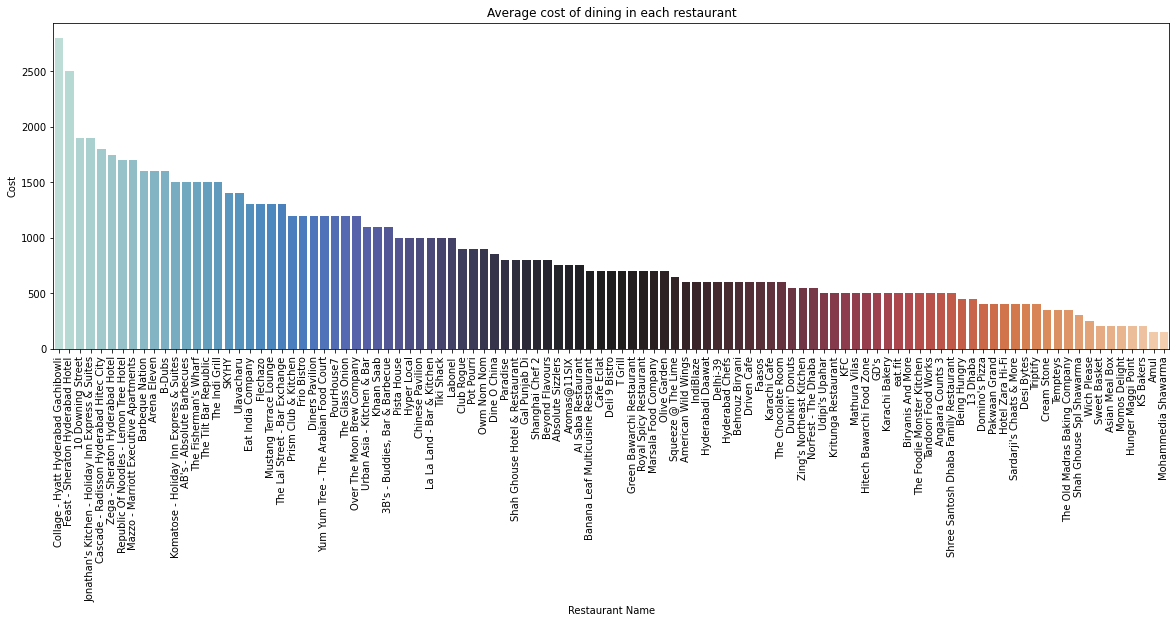

In [428]:
# average cost of each restaurant
avg_cost_vs_rest= df1.groupby(['Name'])['Cost'].mean().sort_values(ascending=False).reset_index()
avg_cost_vs_rest.sort_values(by = 'Cost',ascending = False,inplace = True)

fig = plt.figure(figsize=[20,6])
sns.barplot(data=avg_cost_vs_rest, x='Name', y= 'Cost', palette ="icefire")
plt.title("Average cost of dining in each restaurant")
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.show()

##### 1. Why did you pick the specific chart?

BAR CHART

We are choosing bar chart to visualize the average cost in all 105 restaurant. Since it is bivariate analysis with large number of categories bar chart will be a natural choice.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the College Hyatt Gachibowli restaurant has the highest average cost and the Mohommadia Shawarma restaurant has the lowest average cost. Aside from that, we can see the average cost in descending order on the chart.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, a customer can identify the best-suited restaurant for them based on their budget using the above chart. Restaurant owners can also assess their market position and evaluate their pricing in relation to their competitors.

#### Chart - 5 Bivariate Analysis

Text(0, 0.5, 'count of cuisines in all restaurants')

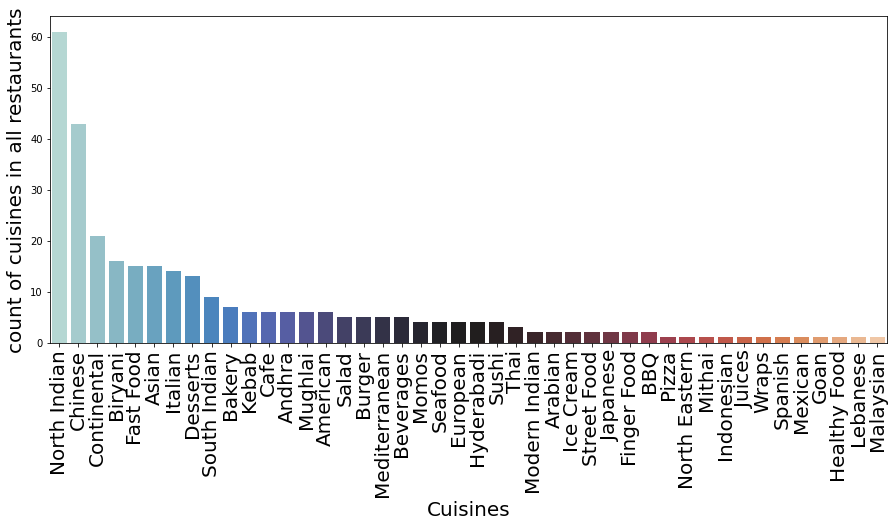

In [429]:
# Chart - 5 visualization code
#creating a df with columns as cuisines_counts abd cuisines_name
diff_cuisines = {} 
for names in list(df1['Cuisines_list']): 
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:  
            diff_cuisines[name]=1 
cuisines_df = pd.DataFrame(diff_cuisines.values(), diff_cuisines.keys(),columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)

fig = plt.figure(figsize=[15,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts',palette ='icefire')
plt.xlabel('Cuisines', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('count of cuisines in all restaurants' , fontsize=20)

##### 1. Why did you pick the specific chart?

BARPLOT

We have chosen Bar chart to visualize the count of restaurants serving a particular cuisine.

##### 2. What is/are the insight(s) found from the chart?

* North Indian is served in the highest number of restaurants in Hyderabad followed by Chinese and Continental.
* Healthy Food, Labanese and Malaysian is served in least number of restaurants

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cusines served by a small number of restaurants have clearly less market demand. So, if the stakeholders implement a marketing strategy to increase the visibility of these cuisines, as well as if they give these cuisines at a discounted rate, it may prove beneficial for the business.

#### Chart - 6 Bivariate Analysis

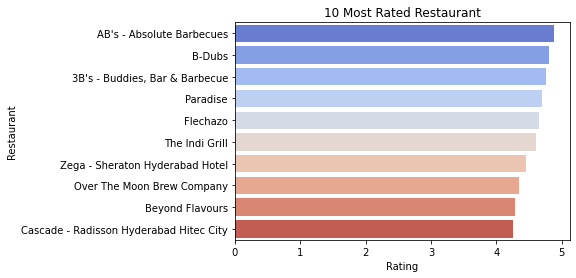

In [430]:
# Chart - 6 visualization code
#Will check best restaurants in terms of rating
top_restaurants= df2.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Rating', y='Restaurant', data=top_restaurants.sort_values(ascending=False, by='Rating')[:10],palette ='coolwarm' )
plt.title('10 Most Rated Restaurant')

plt.show()

##### 1. Why did you pick the specific chart?

BARPLOT

We picked the column chart to visualize the top 10 highest rated restaurants in the market.

##### 2. What is/are the insight(s) found from the chart?

AB - Absolute Barbique is the highest rated restaurant, other restaurant in the list has also similar ratings which is more than 4.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the chart above restaurant owners can assess the quality standards that these restaurants serves and based on that other restaurant can replicate the similar quality srandards and hence they can improve their business.

#### Chart - 7 Bivariate Analysis

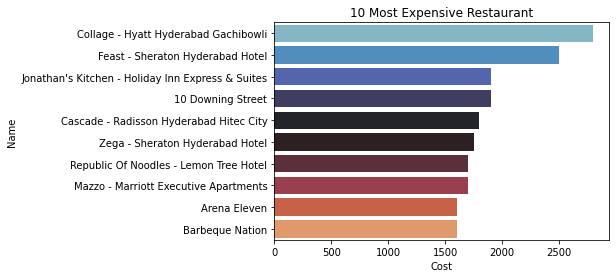

In [431]:
# Chart - 7 visualization code
# top 10 most expensive restaurant
sns.barplot(x='Cost', y='Name', data=df1.sort_values(ascending=False, by='Cost')[:10],palette ='icefire')
plt.title('10 Most Expensive Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

We chose column chart to visualize the top 10 expensive restaurant .Since it is a bivariate analysis of categorical data vs continuous data. Column chart is apt in this scenario.

##### 2. What is/are the insight(s) found from the chart?

Collage-Hayatt Gachibowli restaurant is the most expensive restaurant in the market, followed by Feast - Sheraton Hydrabad hotel by a narrow margin. The other eight restaurants on the list are significantly less expensive than the first two.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we know from the earliar analysis that customers are going for affordable restaurant more often, So the expensive restaurant has very nishe customer base. If they reconsider there price point they could target the masses.

#### Chart - 8

In [432]:
# Chart - 8 visualization code

In [433]:
#creating a dataframe top rated df 
top_rated_df= df_merged.groupby('Name',as_index=False)[['Rating','Cost']]\
            .mean().round(2).sort_values(ascending=False,by='Rating').head(15)

In [434]:
#creating a dataframe expensive rest df
expensive_rest_df= df_merged.groupby('Name',as_index=False)[['Rating','Cost']]\
            .mean().round(2).sort_values(ascending=False,by='Cost').head(15)

In [435]:
#creating a function to vizualize spines 
def prettyprint_spines(ax, right_border=True): 
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

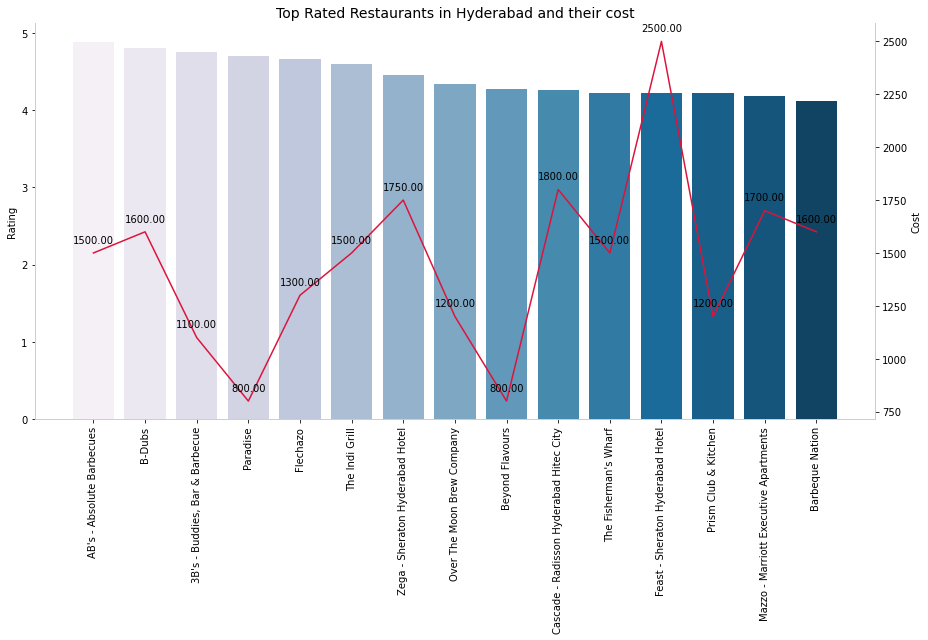

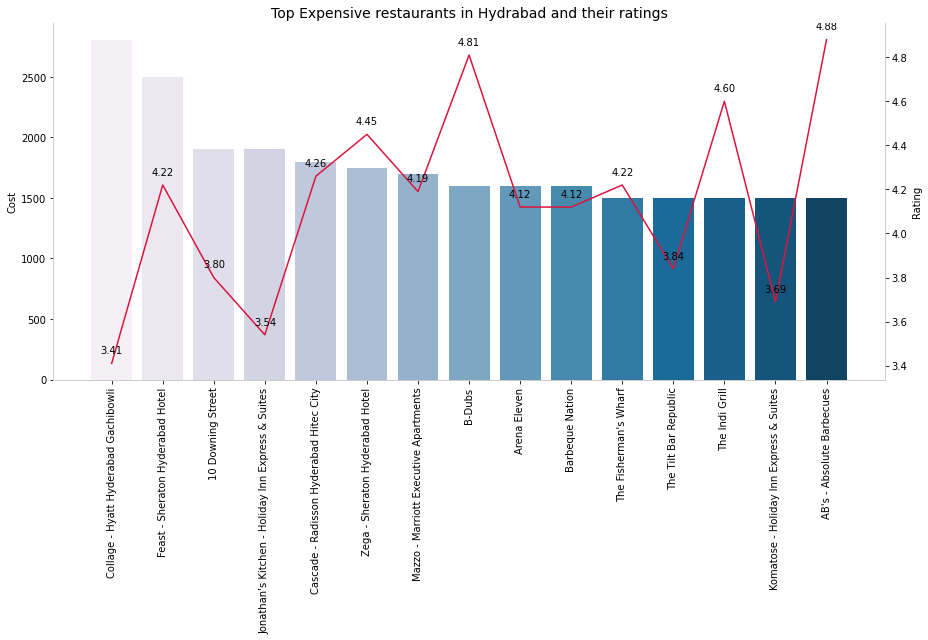

In [436]:
#vizualising top expensive restaurant and their ratings as well as most rated restaurant and their costs using bar chart and spines
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(x='Name', y='Rating', data=top_rated_df, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='Name', y='Cost', data=top_rated_df, ax=ax2, color='crimson', sort=False)

ax.tick_params(axis='x', labelrotation=90)
prettyprint_spines(ax, right_border=True)
prettyprint_spines(ax2, right_border=True)
ax.xaxis.set_label_text("")

xs = np.arange(0,20,1)
ys =top_rated_df['Cost']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)
ax.set_title('Top Rated Restaurants in Hyderabad and their cost', size=14)
ax.set_ylabel('Rating')
ax2.set_ylabel('Cost')
plt.tight_layout()
plt.show()
#Newly added code
#Expensive Restaurants in Hyderabad with ratings
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(x='Name', y='Cost', data=expensive_rest_df,ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='Name', y='Rating', data= expensive_rest_df, ax=ax2, color='crimson', sort=False)

ax.tick_params(axis='x', labelrotation=90)
prettyprint_spines(ax, right_border=True)
prettyprint_spines(ax2, right_border=True)
ax.xaxis.set_label_text("")

xs = np.arange(0,20,1)
ys = expensive_rest_df['Rating']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)
ax.set_title('Top Expensive restaurants in Hydrabad and their ratings', size=14)
ax.set_ylabel('Cost')
ax2.set_ylabel('Rating')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

We used a column chart with a spine chart on top to depict the Top Rated Restaurants in Hyderabad and their dining costs, as well as the Top Expensive Restaurants in Hyderabad and their reviewer ratings. Because this is a bivariate analysis of categorical vs. continuous data. In this case, a column chart and a line chart are appropriate.

##### 2. What is/are the insight(s) found from the chart?

* Some of the restaurants with very high reviews are not particularly pricey. Paradise Restaurant, for example, or Beyond Flavours Restaurant.
* Collage - Hyyat Hyderabad Gachibowli and Janathan's Kitchen are among Hyderabad's most costly restaurant, with a rating of 3.41 and 3.54 respectively. As a result, if quality is not maintained, this restaurant may lose business.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Based on the analysis above any restaurant owner can determine the gaps between their price point and the average ratings they receive, based on that they can come to conclusion whether they need to level up the services they provide or they need to reconsider their price point to maintain their position in the market or to perform better than earlier.

#### Chart - 9

In [437]:
# Chart - 9 visualization code

(-0.5, 1399.5, 1399.5, -0.5)

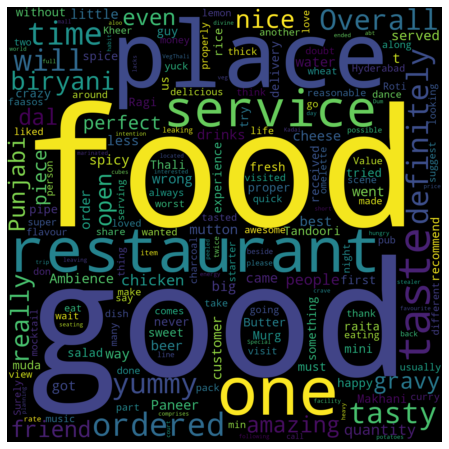

In [438]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in df2.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

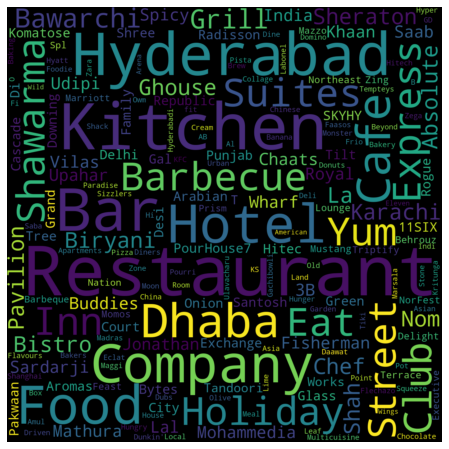

In [439]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in df_merged.sort_values('Cuisines_list',ascending=False).Name)


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

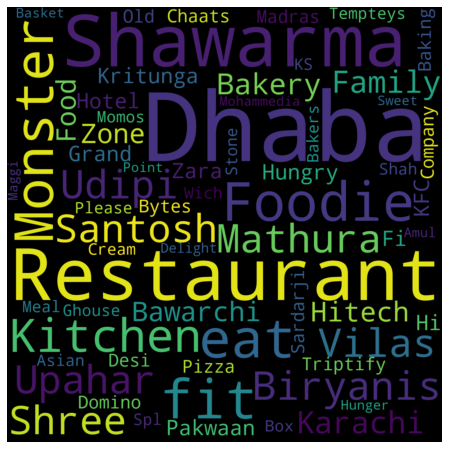

In [440]:
#Creating word cloud for cheap restaurants

plt.figure(figsize=(15,8))
text = " ".join(name for name in df1.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [441]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [442]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [443]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [444]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [445]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [446]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [447]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [448]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [449]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [450]:
#checking 1st instance of top_restaurants df
top_restaurants.head(1)

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.88


In [451]:
#creating a new dataframe df3 with Name, Cost, Cuisines and Total Cuisines as Columns and renaming Name as Restaurant
df3 = df1[['Name','Cost','Cuisines','Total Cuisines']]
df3=df3.rename(columns = {'Name': 'Restaurant'})

In [452]:
#checking 1st instance of df3
df3.head(1)

,Restaurant,Cost,Cuisines,Total Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",6


In [453]:
#creating a cluster_df by merging top_restaurants and df3
cluster_df = df3.merge(top_restaurants, how='left',on = 'Restaurant' )

In [454]:
#checking 1st instance of df2
df2.head(1)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0


In [455]:
#to extract no. of reviews and number of followers
#creating 2 dfs -Total_followers and Total reviews by using some group by operations
Total_followers = pd.DataFrame(df2.groupby(['Restaurant'])['No. of Reviews'].sum().reset_index())
Total_reviews = pd.DataFrame(df2.groupby(['Restaurant'])['Followers'].sum().reset_index())

In [456]:
#merging the two above created df into the cluster df
cluster_df = cluster_df.merge(Total_followers, how='left',on = 'Restaurant' )
cluster_df = cluster_df.merge(Total_reviews, how='left',on = 'Restaurant' )

In [457]:
#finally checking the 1st row of cluster_df 
cluster_df.head(1)

,Restaurant,Cost,Cuisines,Total Cuisines,Rating,No. of Reviews,Followers
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",6,4.28,752.0,10061.0


In [458]:
#checking info of cluster_df
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      105 non-null    object 
 1   Cost            105 non-null    int64  
 2   Cuisines        105 non-null    object 
 3   Total Cuisines  105 non-null    int64  
 4   Rating          100 non-null    float64
 5   No. of Reviews  100 non-null    float64
 6   Followers       100 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 6.6+ KB


In [459]:
#checking statistical summary of cluster_df
cluster_df.describe()

,Cost,Total Cuisines,Rating,No. of Reviews,Followers
count,105.000000,105.000000,100.000000,100.000000,100.000000
mean,861.428571,2.980952,3.601929,2389.870000,16237.410000
std,510.149730,1.208790,0.508102,1359.707453,10840.732973
min,150.000000,1.000000,2.400000,252.000000,562.000000
25%,500.000000,2.000000,3.245000,1482.500000,8554.000000
50%,700.000000,3.000000,3.615000,2140.000000,14450.500000
75%,1200.000000,4.000000,3.846250,3091.250000,22090.750000
max,2800.000000,6.000000,4.880000,6628.000000,51068.000000


### 1. Handling Missing Values

In [460]:
#KNN to find the missing values
#importing StandardScaler and KNNImputer to impute 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#Let's define the scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Impute the missing values with KNN if any
cluster_df['Rating'] = imputer.fit_transform((cluster_df['Rating'].values.reshape(-1,1)))
cluster_df['No. of Reviews'] = imputer.fit_transform((cluster_df['No. of Reviews'].values.reshape(-1,1)))
cluster_df['Followers'] = imputer.fit_transform((cluster_df['Followers'].values.reshape(-1,1)))

In [461]:
#checking statistical summary of cluster_df
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      105 non-null    object 
 1   Cost            105 non-null    int64  
 2   Cuisines        105 non-null    object 
 3   Total Cuisines  105 non-null    int64  
 4   Rating          105 non-null    float64
 5   No. of Reviews  105 non-null    float64
 6   Followers       105 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 6.6+ KB


#### What all missing value imputation techniques have you used and why did you use those techniques?

We have used KNN Imputer 
KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
k-Nearest Neighbours (kNN) that identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.

### 2. Handling Outliers

In [462]:
# Handling Outliers & Outlier treatments
from scipy import stats
z = np.abs(stats.zscore(cluster_df[['Cost','Total Cuisines','Rating','No. of Reviews','Followers']]))
print(z)
cluster_df=cluster_df[(z<3).all(axis=1)]
cluster_df.shape

         Cost  Total Cuisines    Rating  No. of Reviews  Followers
0    0.120990        2.509558  1.374364        1.240541   0.586752
1    0.120990        0.015833  2.225650        1.619246   1.466726
2    0.863815        0.847075  2.144575        1.304921   1.281479
3    0.120990        1.678316  0.794390        0.724744   0.417464
4    0.666854        1.678316  1.495976        0.423294   0.876593
..        ...             ...       ...             ...        ...
100  0.514912        0.815408  0.000000        0.000000   0.000000
101  1.302757        0.815408  0.000000        0.000000   0.000000
102  0.711873        0.015833  0.000000        0.000000   0.000000
103  1.204276        1.646650  0.000000        0.000000   0.000000
104  1.651659        0.847075  0.000000        0.000000   0.000000

[105 rows x 5 columns]


(101, 7)

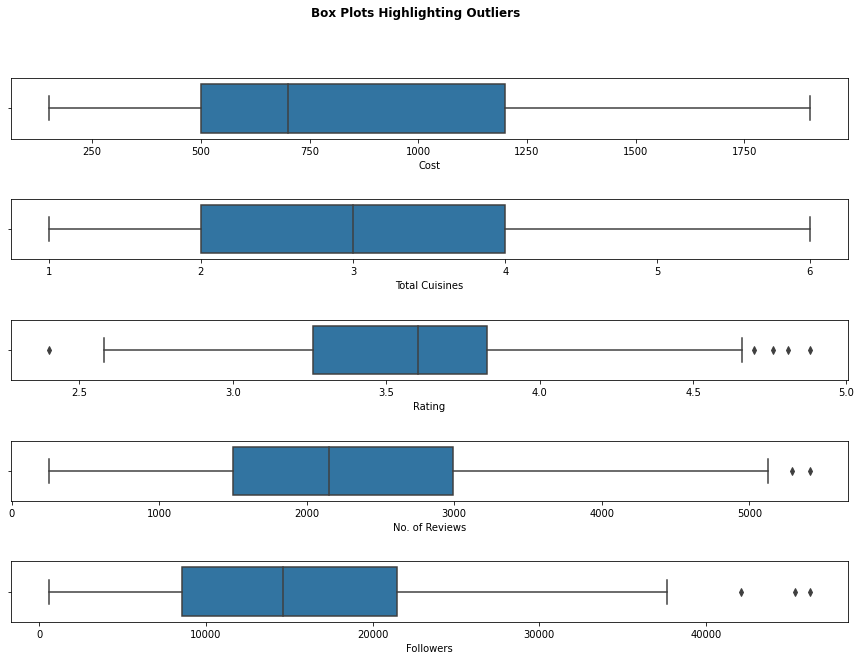

In [463]:
# plotting box plot to check for the outliers in each feature
nrows = len(['Cost','Total Cuisines','Rating','No. of Reviews','Followers'])
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(['Cost','Total Cuisines','Rating','No. of Reviews','Followers']):
    sns.boxplot(cluster_df[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

In [464]:
#checking statistical summary of cluster_df
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 104
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      101 non-null    object 
 1   Cost            101 non-null    int64  
 2   Cuisines        101 non-null    object 
 3   Total Cuisines  101 non-null    int64  
 4   Rating          101 non-null    float64
 5   No. of Reviews  101 non-null    float64
 6   Followers       101 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 6.3+ KB


##### What all outlier treatment techniques have you used and why did you use those techniques?


We have used Z score technique to detect and treat the outlier Z score is also called standard score. Z score = (x -mean) / std. deviation If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. So we have kept all the data points which are within 3 standard deviation and eliminated the others.


### 3. Categorical Encoding

In [465]:
# Encode your categorical columns
numerical_df = cluster_df[['Cost','Total Cuisines','Rating','No. of Reviews','Followers']]
text_df = cluster_df[['Restaurant','Cuisines']]
numerical_df = pd.concat([numerical_df,pd.DataFrame(columns=list(diff_cuisines.keys()))])

In [466]:
#We will iterate for every row in the dataframe
for i, row in numerical_df.iterrows():
  # We will interate over new columns for every row
  for column in list(numerical_df.columns):
      if column not in ['Cost','Total Cuisines','Rating','No. of Reviews','Followers']:
        # will check if the column is in the list of cuisines available for that row
        if column in text_df['Cuisines']:
          #then assign it as 1 else 0
          numerical_df.loc[i,column] = 1
        else:
          numerical_df.loc[i,column] = 0

In [467]:
numerical_df.head(1)
numerical_df.columns

Index(['Cost', 'Total Cuisines', 'Rating', 'No. of Reviews', 'Followers',
       'Chinese', 'Continental', 'Kebab', 'European', 'South Indian',
       'North Indian', 'Biryani', 'Asian', 'Mediterranean', 'Desserts',
       'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese', 'American',
       'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Andhra', 'Bakery', 'Juices', 'Arabian', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [468]:
# Expand Contraction

#### 2. Lower Casing

In [469]:
# Lower Casing

#### 3. Removing Punctuations

In [470]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [471]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [472]:
# Remove Stopwords

In [473]:
# Remove White spaces

#### 6. Rephrase Text

In [474]:
# Rephrase Text

#### 7. Tokenization

In [475]:
# Tokenization

#### 8. Text Normalization

In [476]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [477]:
# POS Taging

#### 10. Text Vectorization

In [478]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [479]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [480]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [481]:
# Transform Your data

### 6. Data Scaling

In [482]:
from sklearn.preprocessing import MinMaxScaler
#Min max scaler for only numeric columns

# column_names
column_names = list(numerical_df.columns)

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(numerical_df)
#print(scaled)
scaled_df = pd.DataFrame(scaler.fit_transform(numerical_df))
scaled_df.columns = column_names

In [483]:
scaled_df.head(2)

,Cost,Total Cuisines,Rating,No. of Reviews,Followers,Chinese,Continental,Kebab,European,South Indian,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,0.371429,1.0,0.758065,0.096956,0.208006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.371429,0.4,0.927419,0.000000,0.005168,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [484]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [485]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [486]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 K MEANS CLUSTERING

In [487]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [488]:
#Within Cluster Sum of Squared Errors for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(scaled_df)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

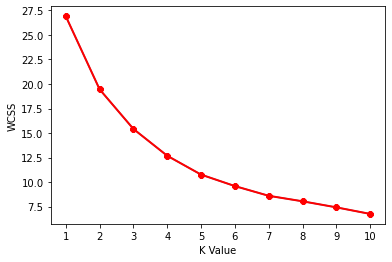

In [489]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

In [490]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(scaled_df)          # fit model 
    score = silhouette_score(scaled_df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

Parameter: {'n_clusters': 2} Score 0.2499995319706198
Parameter: {'n_clusters': 3} Score 0.24083161453288493
Parameter: {'n_clusters': 4} Score 0.24068124264425506
Parameter: {'n_clusters': 5} Score 0.25888207072282804
Parameter: {'n_clusters': 6} Score 0.25281210758150274
Parameter: {'n_clusters': 7} Score 0.23149992162140012
Parameter: {'n_clusters': 8} Score 0.23091015243113164
Parameter: {'n_clusters': 9} Score 0.22054972513567908
Parameter: {'n_clusters': 10} Score 0.24102955147923116


In [491]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(scaled_df)

PCA()

(0.0, 10.0)

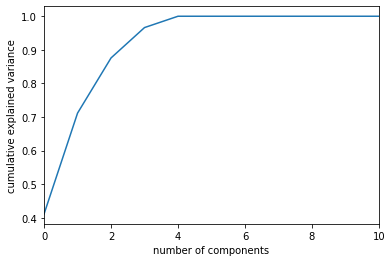

In [492]:
#explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([0, 10])

In [493]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 2
from sklearn.decomposition import PCA
transformer = PCA(n_components=2)
transformer.fit(scaled_df)
transformed_df = transformer.transform(scaled_df)
transformed_df.shape

(101, 2)

For n_clusters = 2 The average silhouette_score is : 0.3470911386916606
For n_clusters = 3 The average silhouette_score is : 0.3535659299494818
For n_clusters = 4 The average silhouette_score is : 0.3803787066435235
For n_clusters = 5 The average silhouette_score is : 0.3701645526234632
For n_clusters = 6 The average silhouette_score is : 0.3870249760313973


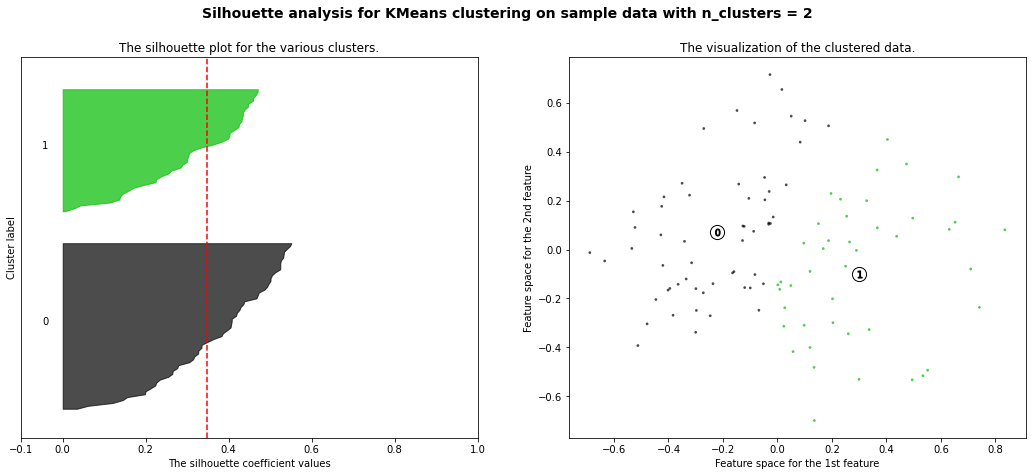

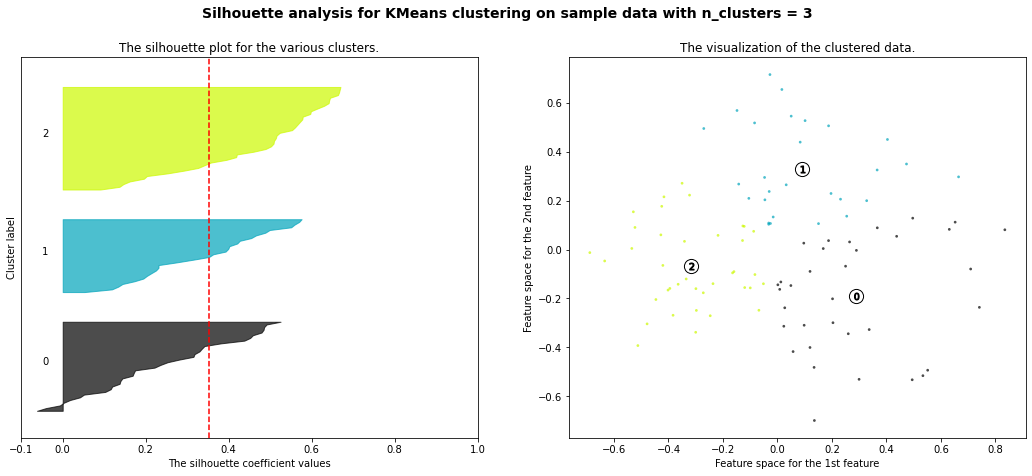

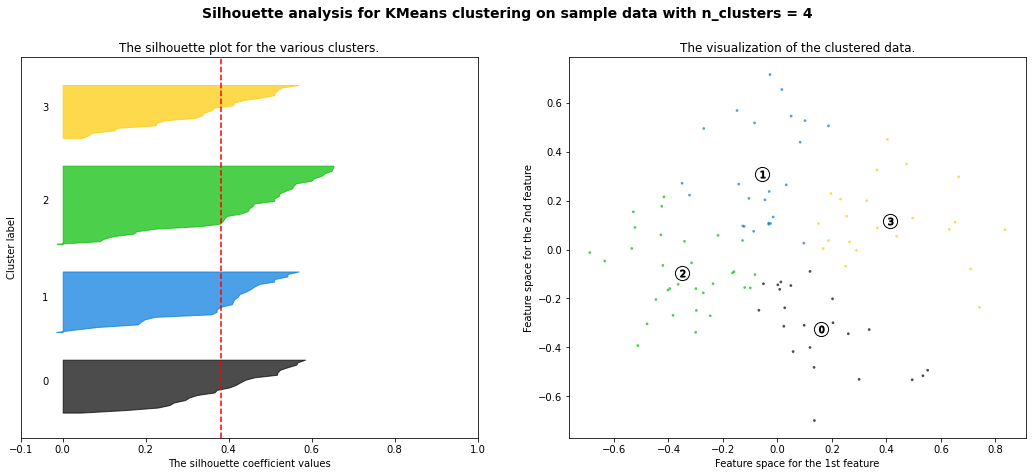

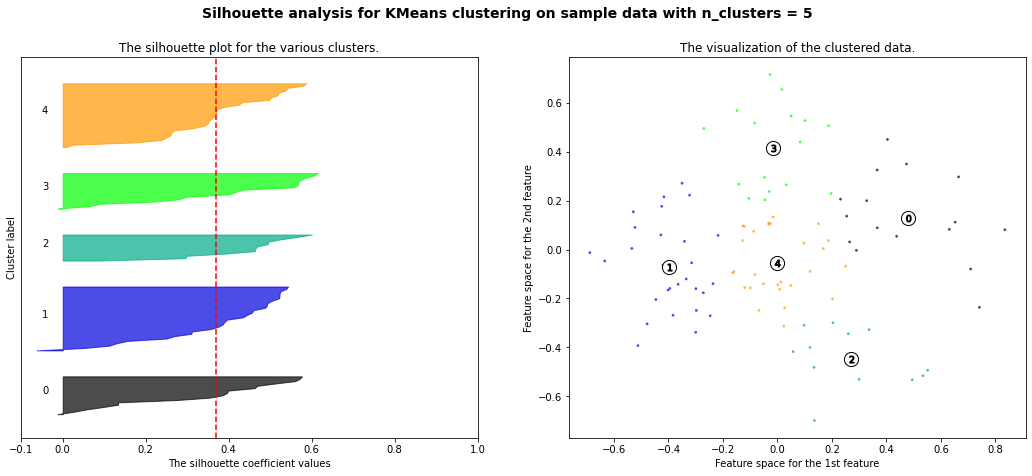

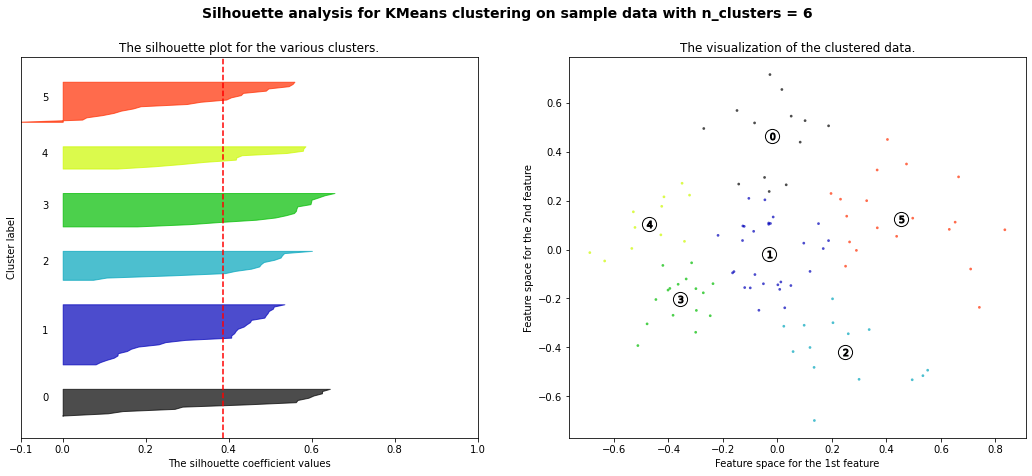

In [494]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(transformed_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(transformed_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(transformed_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(transformed_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(transformed_df[:, 0], transformed_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

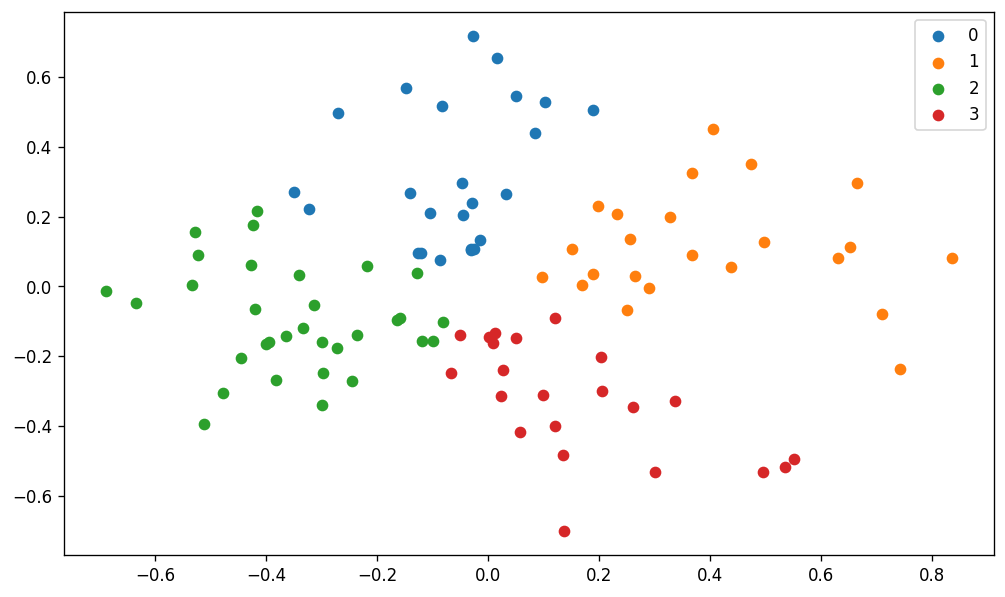

In [495]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=4, init= 'k-means++', random_state=42)
kmeans.fit(transformed_df)

#predict the labels of clusters.
label = kmeans.fit_predict(transformed_df)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(transformed_df[label == i , 0] , transformed_df[label == i , 1] , label = i)
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [496]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [497]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [498]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [499]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [500]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [501]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [502]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [503]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [504]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***